<a href="https://colab.research.google.com/github/AlgoRex2/graymatter-ml/blob/main/BMW_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# C1 - File Upload

from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=filename, length=len(uploaded[filename])))

Saving BMW sales data (2010-2024) (1).csv to BMW sales data (2010-2024) (1).csv
User uploaded file "BMW sales data (2010-2024) (1).csv" with length 3392695 bytes


In [4]:
# C2 - Load and Inspect the Data

import pandas as pd

# Load the dataset into a pandas DataFrame using the correct filename
df = pd.read_csv('BMW sales data (2010-2024) (1).csv')

# Display the first 5 rows of the DataFrame
print(df.head())

# Print a summary of the DataFrame to see data types and non-null values
print(df.info())

      Model  Year         Region  Color Fuel_Type Transmission  Engine_Size_L  \
0  5 Series  2016           Asia    Red    Petrol       Manual            3.5   
1        i8  2013  North America    Red    Hybrid    Automatic            1.6   
2  5 Series  2022  North America   Blue    Petrol    Automatic            4.5   
3        X3  2024    Middle East   Blue    Petrol    Automatic            1.7   
4  7 Series  2020  South America  Black    Diesel       Manual            2.1   

   Mileage_KM  Price_USD  Sales_Volume Sales_Classification  
0      151748      98740          8300                 High  
1      121671      79219          3428                  Low  
2       10991     113265          6994                  Low  
3       27255      60971          4047                  Low  
4      122131      49898          3080                  Low  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-N

Direction of the Project based on the above Data
1. Exploratory Data Analysis (EDA)
This phase will focus on understanding the data and uncovering key insights. We'll use visualizations and descriptive statistics to answer fundamental questions about the market.

Market Snapshot: What are the most popular BMW models and regions in the dataset? We can use bar charts to visualize the sales volume for different models and regions.

Pricing Insights: How does the Price_USD relate to key factors like Mileage_KM, Year, and Engine_Size_L? We'll use scatter plots to visualize these relationships and see if there are any clear correlations.

Categorical Trends: We'll analyze the preferences for different Fuel_Type, Transmission, and Color options. For example, are automatic transmissions more popular than manual?

2. Market Trend Analysis
We use the Year column to analyze how the BMW market has evolved over time.

Historical Trends: How have the average price and sales volume of BMWs changed from 2010 to 2024? A time-series plot would be ideal for this analysis.

Fuel Type Popularity: How has the market share of Petrol, Diesel, and Hybrid vehicles changed over the years? This is a great way to show how consumer preferences are shifting.

3. Predictive Modeling
This is where we can apply machine learning to make predictions based on the data.

Price Prediction: The most interesting project is to build a model that can predict the price of a BMW based on its features (Model, Year, Mileage, Engine Size, etc.). We can then evaluate which features have the biggest impact on the final price.

All of these directions are viable with this dataset by Analysing the C2 Output

Statistical Summary of Numerical Columns:
               Year  Engine_Size_L     Mileage_KM      Price_USD  Sales_Volume
count  50000.000000   50000.000000   50000.000000   50000.000000  50000.000000
mean    2017.015700       3.247180  100307.203140   75034.600900   5067.514680
std        4.324459       1.009078   57941.509344   25998.248882   2856.767125
min     2010.000000       1.500000       3.000000   30000.000000    100.000000
25%     2013.000000       2.400000   50178.000000   52434.750000   2588.000000
50%     2017.000000       3.200000  100388.500000   75011.500000   5087.000000
75%     2021.000000       4.100000  150630.250000   97628.250000   7537.250000
max     2024.000000       5.000000  199996.000000  119998.000000   9999.000000

-----------------------------------

Correlation Matrix:
                   Year  Engine_Size_L  Mileage_KM  Price_USD  Sales_Volume
Year           1.000000      -0.001944    0.008741   0.003547      0.001671
Engine_Size_L -0.001944       1.00000

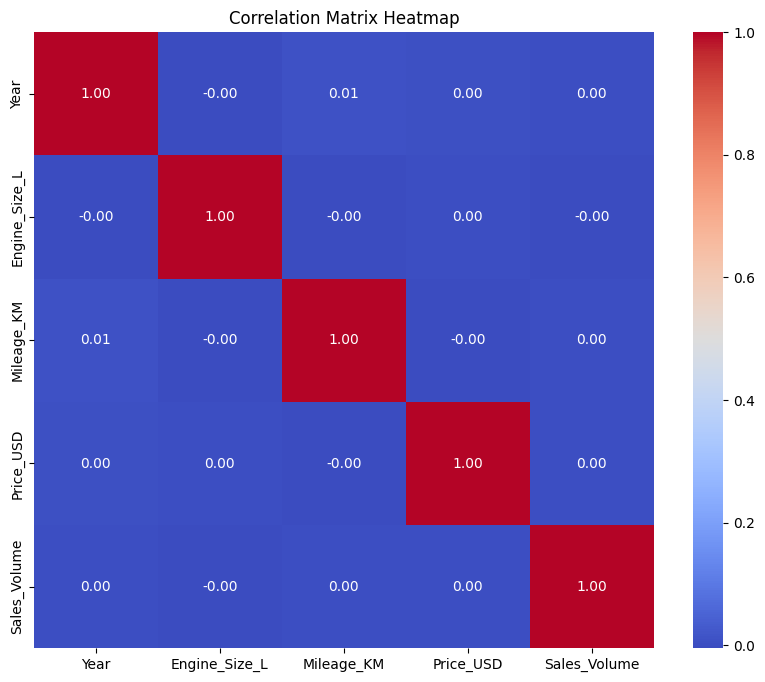

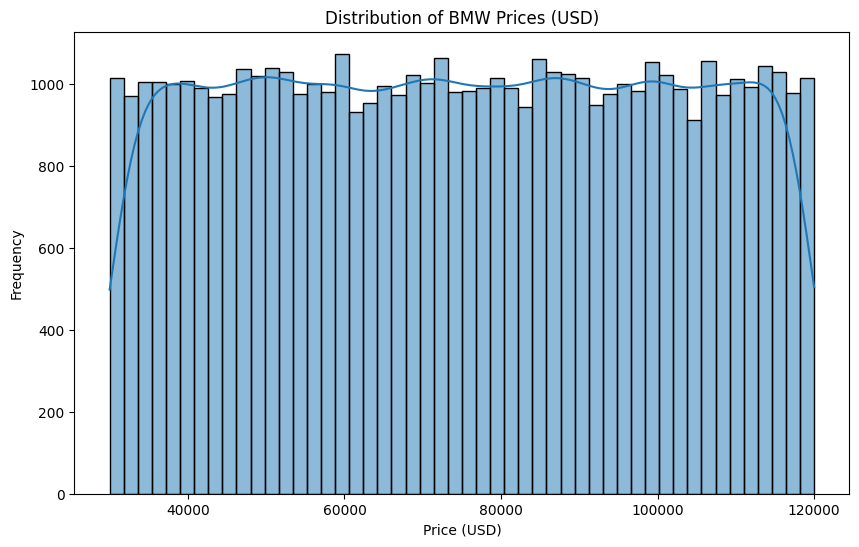

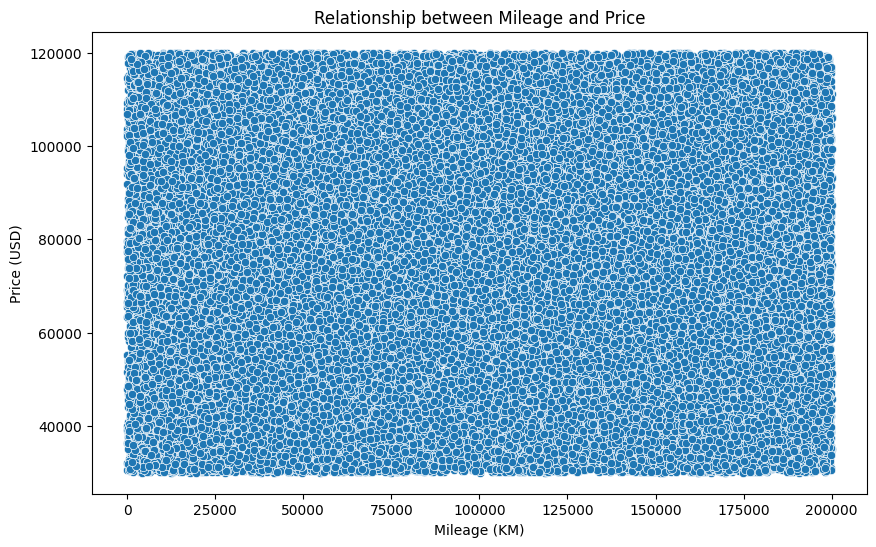

In [5]:
# C3 - Statistical Summary and Correlation Analysis

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# We must load your DataFrame first if we haven't already
# For example: df = pd.read_csv('BMW sales data (2010-2024) (1).csv')

# Get a statistical summary of the numerical columns

print("Statistical Summary of Numerical Columns:")
print(df.describe())

print("\n-----------------------------------\n")

# Calculate the correlation matrix for numerical columns

correlation_matrix = df.corr(numeric_only=True)
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Visualize the distribution of the Price_USD

plt.figure(figsize=(10, 6))
sns.histplot(df['Price_USD'], bins=50, kde=True)
plt.title('Distribution of BMW Prices (USD)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

# Visualize the relationship between Mileage and Price

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage_KM', y='Price_USD', data=df)
plt.title('Relationship between Mileage and Price')
plt.xlabel('Mileage (KM)')
plt.ylabel('Price (USD)')
plt.show()

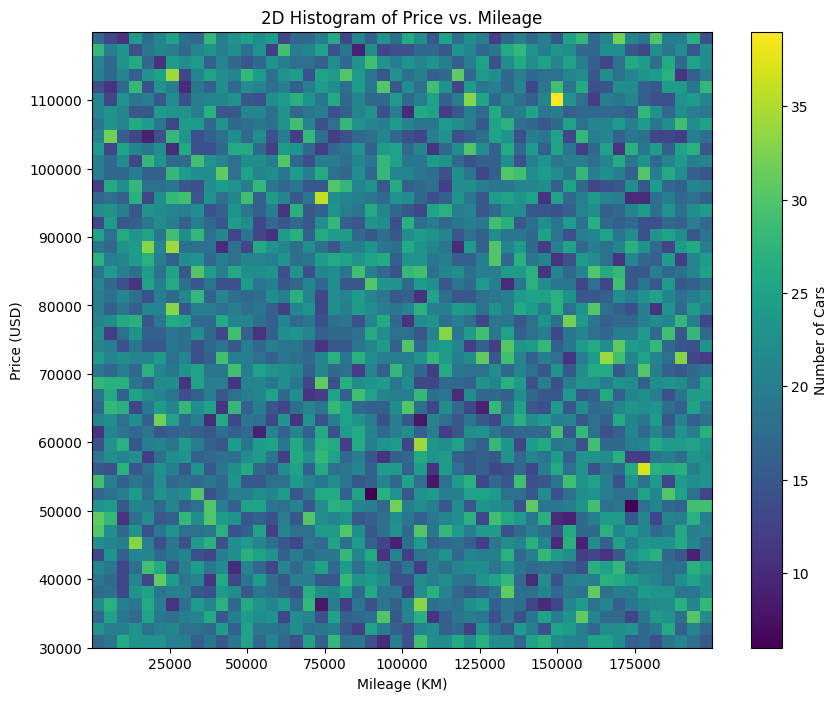

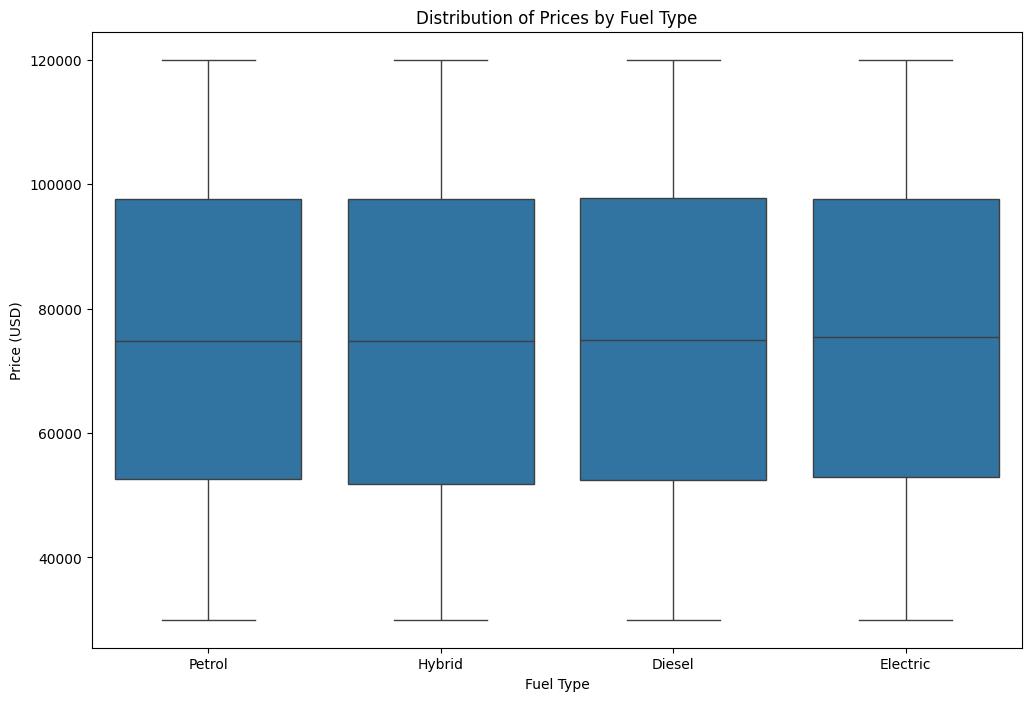

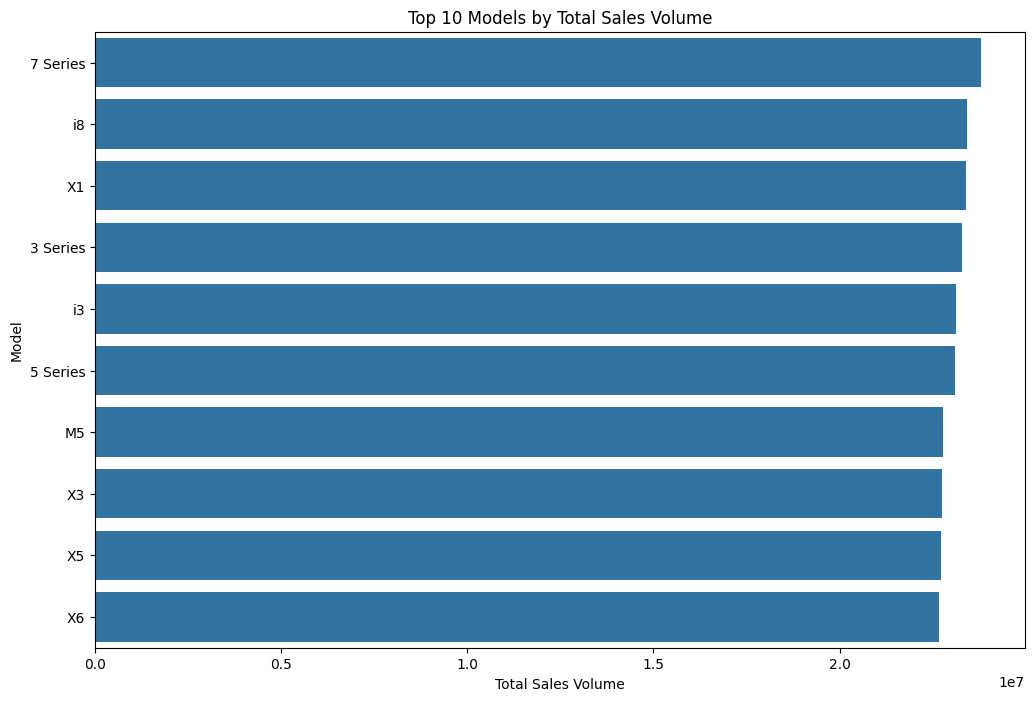

In [6]:
# C4 - Advanced Visualizations for a Large Dataset

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure we've loaded our DataFrame first
# Example: df = pd.read_csv('your_dataset_name.csv')

# --- Analysis 1: Price and Mileage Density (2D Histogram) ---
# A 2D histogram is better than a scatter plot for large datasets as it shows data density.

plt.figure(figsize=(10, 8))
plt.hist2d(df['Mileage_KM'], df['Price_USD'], bins=(50, 50), cmap='viridis')
plt.colorbar(label='Number of Cars')
plt.xlabel('Mileage (KM)')
plt.ylabel('Price (USD)')
plt.title('2D Histogram of Price vs. Mileage')
plt.show()

# --- Analysis 2: Distribution of Prices by Fuel Type (Box Plot) ---
# A box plot is a great way to compare the distribution of a numerical variable across categories.

plt.figure(figsize=(12, 8))
sns.boxplot(x='Fuel_Type', y='Price_USD', data=df)
plt.title('Distribution of Prices by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price (USD)')
plt.show()

# --- Analysis 3: Top 10 Models by Sales Volume (Bar Chart) ---
# A bar chart is perfect for comparing categorical data.
# First, we need to group the data and get the top 10 models.

top_models = df.groupby('Model')['Sales_Volume'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Sales_Volume', y='Model', data=top_models)
plt.title('Top 10 Models by Total Sales Volume')
plt.xlabel('Total Sales Volume')
plt.ylabel('Model')
plt.show()

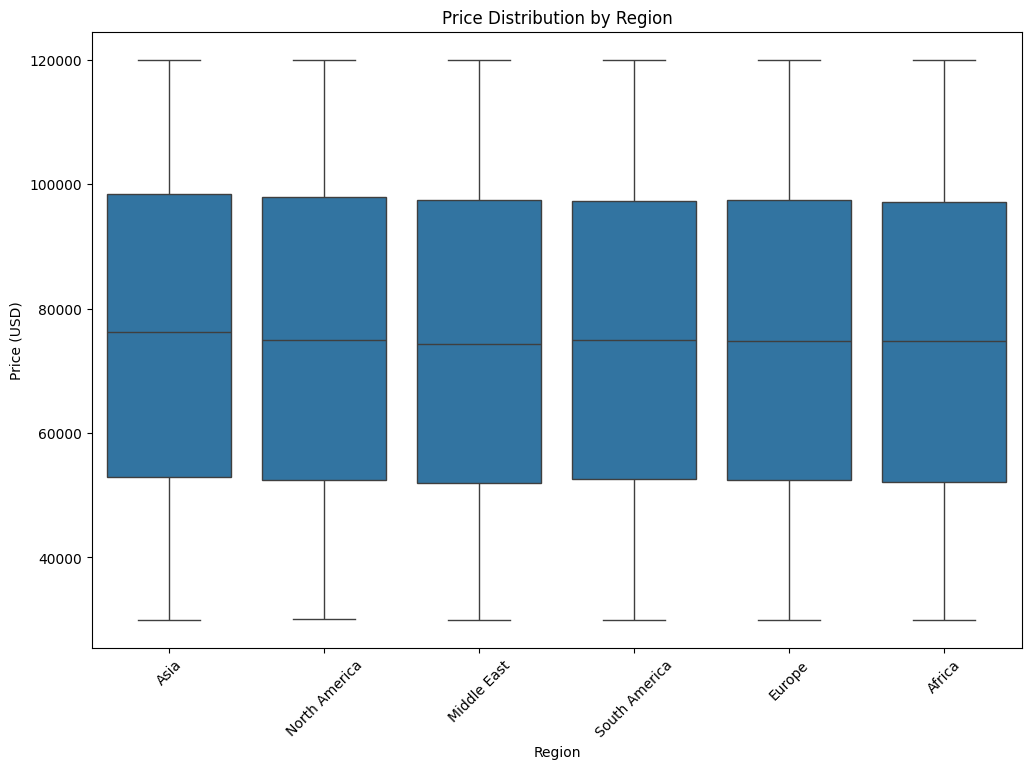

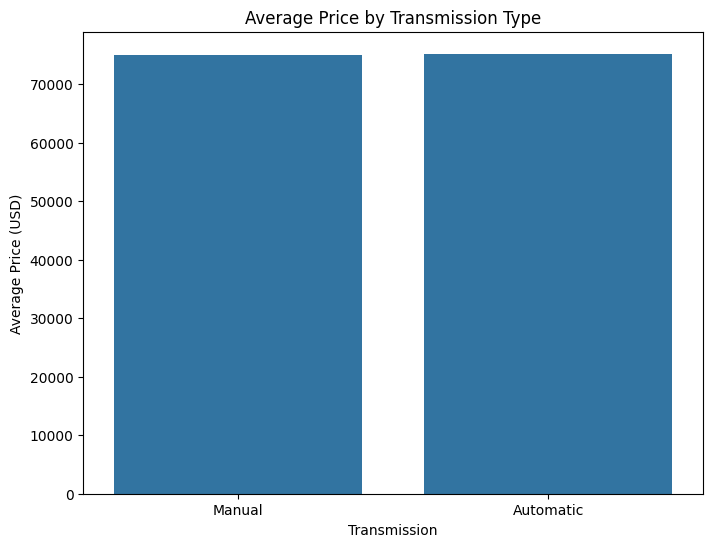

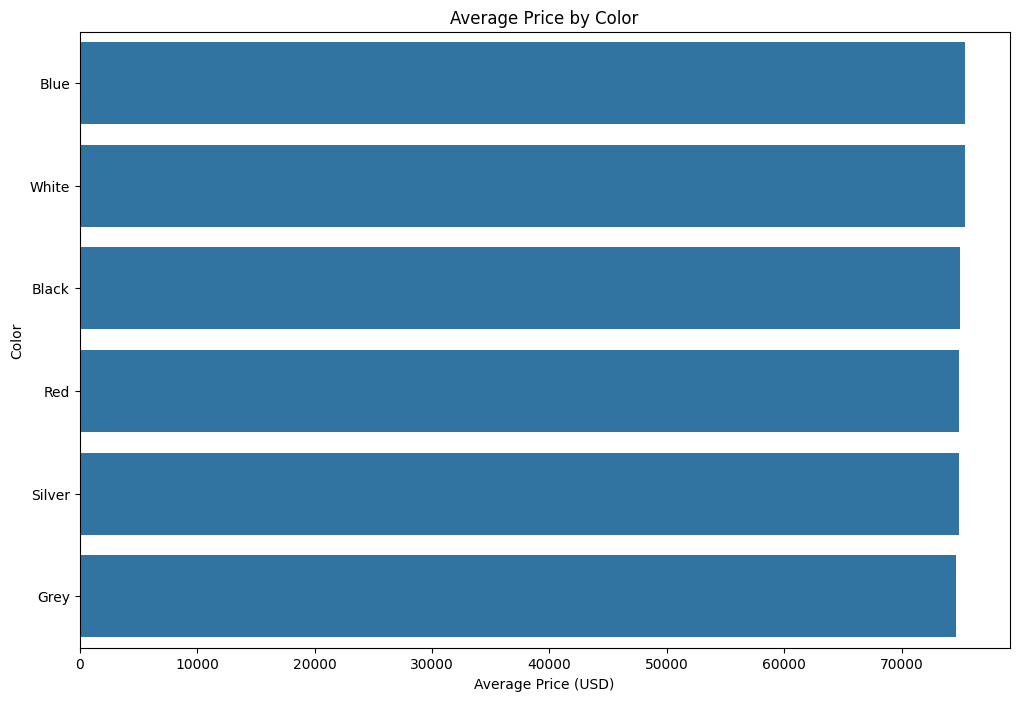

In [7]:
#C5
# Now that we've explored the quantitative data, let's turn our attention to the categorical variables.
# We can gain valuable market insights by analyzing how factors like region,
# transmission type, and color affect the price of BMWs.

# C5 - Categorical Analysis and Visualizations

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure our DataFrame 'df' is loaded from a previous cell

# --- Analysis 1: Price Distribution by Region (Box Plot) ---
# This plot will help us see if there are significant price differences between regions.

plt.figure(figsize=(12, 8))
sns.boxplot(x='Region', y='Price_USD', data=df)
plt.title('Price Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.show()

# --- Analysis 2: Average Price by Transmission Type (Bar Chart) ---
# We can use a bar chart to compare the average price of automatic vs. manual cars.

plt.figure(figsize=(8, 6))
sns.barplot(x='Transmission', y='Price_USD', data=df, errorbar=None)
plt.title('Average Price by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Average Price (USD)')
plt.show()

# --- Analysis 3: Average Price by Color (Bar Chart) ---
# Let's see if certain colors command a higher price. We'll sort the bars for readability.

avg_price_by_color = df.groupby('Color')['Price_USD'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Price_USD', y='Color', data=avg_price_by_color)
plt.title('Average Price by Color')
plt.xlabel('Average Price (USD)')
plt.ylabel('Color')
plt.show()

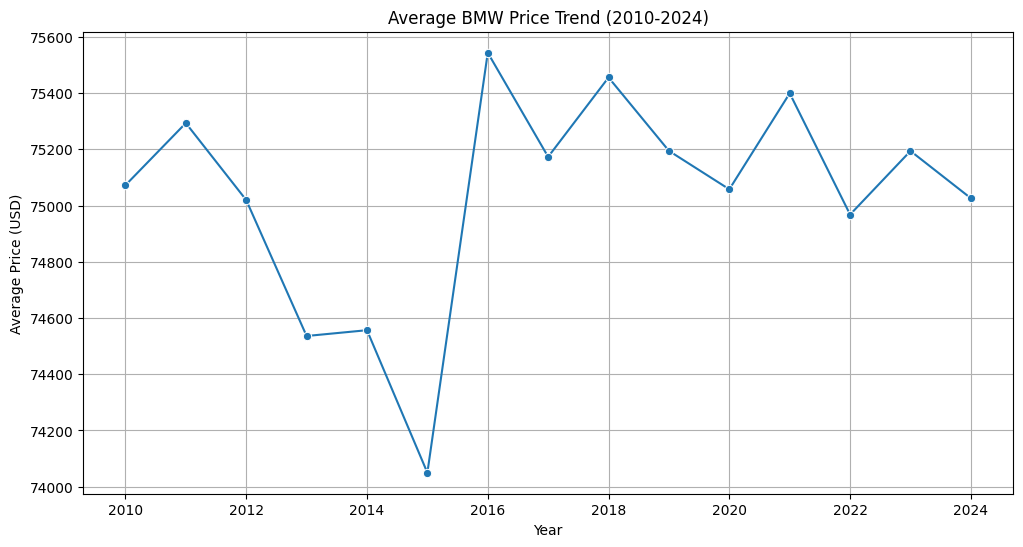

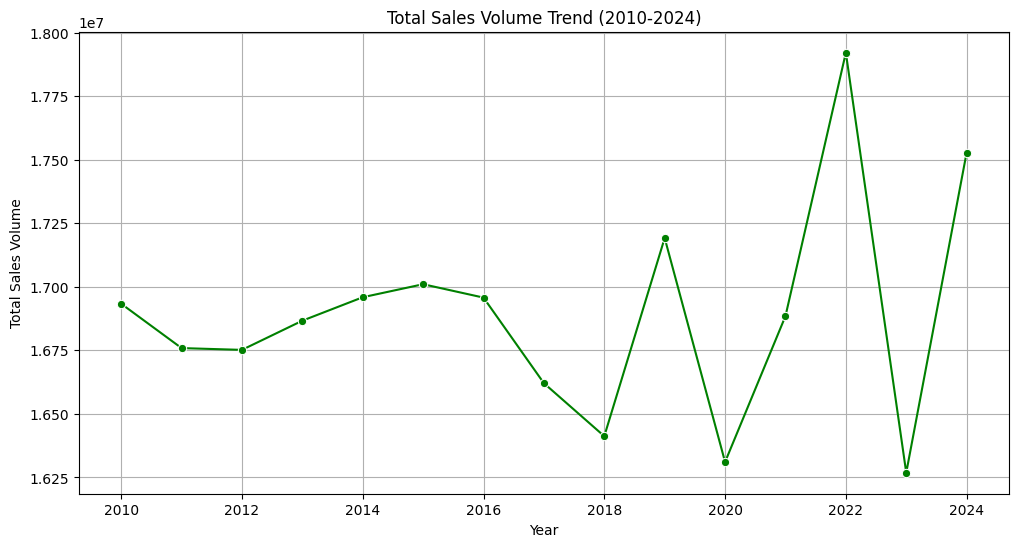

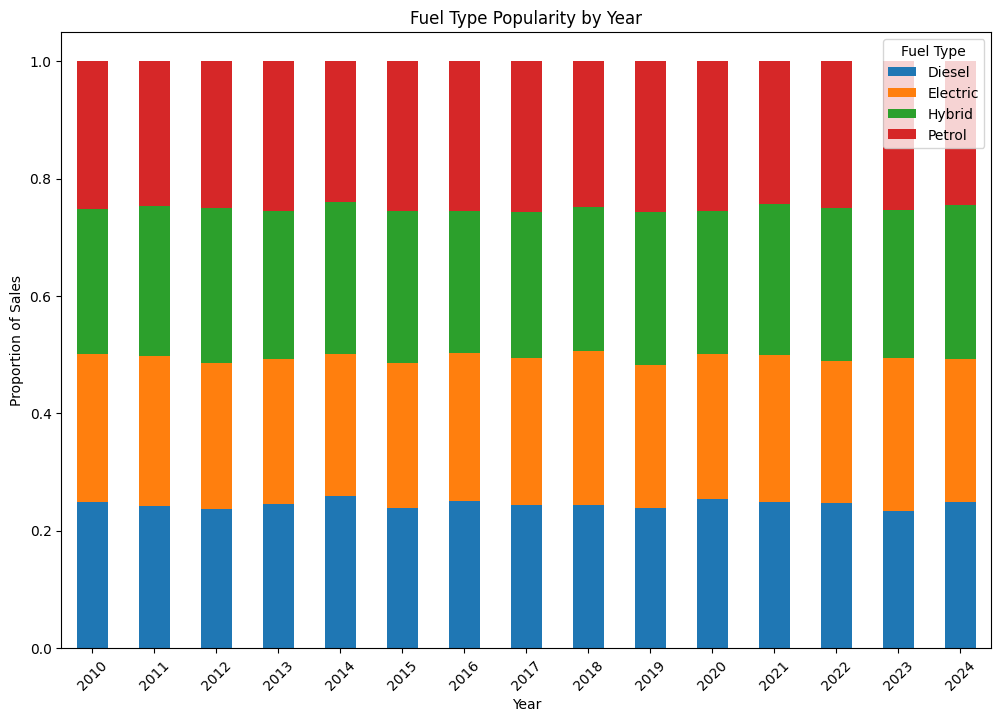

In [8]:
# C6
# Now that we've seen the current state of the market, let's analyze how it has changed over time.
# This will help us identify trends and seasonality

# C6 - Analyzing Market Trends Over Time

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure our DataFrame 'df' is loaded from a previous cell

# --- Analysis 1: Average Price Trend Over the Years ---
# We'll group the data by 'Year' and calculate the average price.

price_by_year = df.groupby('Year')['Price_USD'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Price_USD', data=price_by_year, marker='o')
plt.title('Average BMW Price Trend (2010-2024)')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')
plt.grid(True)
plt.show()

# --- Analysis 2: Total Sales Volume Trend Over the Years ---
# We'll group by 'Year' and sum the sales volume.

sales_by_year = df.groupby('Year')['Sales_Volume'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Sales_Volume', data=sales_by_year, marker='o', color='green')
plt.title('Total Sales Volume Trend (2010-2024)')
plt.xlabel('Year')
plt.ylabel('Total Sales Volume')
plt.grid(True)
plt.show()

# --- Analysis 3: Fuel Type Popularity Over Time (Stacked Bar Chart) ---
# This plot will show how the market share of different fuel types has changed.

fuel_by_year = df.groupby(['Year', 'Fuel_Type']).size().unstack(fill_value=0)
fuel_by_year_norm = fuel_by_year.div(fuel_by_year.sum(axis=1), axis=0)

fuel_by_year_norm.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Fuel Type Popularity by Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Sales')
plt.xticks(rotation=45)
plt.legend(title='Fuel Type')
plt.show()

In [15]:
# C7

# The first step in building a machine learning model is data preprocessing.
# We need to get our data into a format that a model can understand,
# which means converting categorical data into numerical data
# and creating any new features that might be useful.

# C7 - Data Preprocessing for Predictive Modeling

# Ensure your DataFrame 'df' is loaded from a previous cell

# --- Step 1: Feature Engineering ---
# Let's create a new feature: 'Car_Age'. This can be a strong predictor of price.
import datetime
current_year = datetime.datetime.now().year
df['Car_Age'] = current_year - df['Year']

# --- Step 2: One-Hot Encoding for Categorical Data ---
# We'll select the features we plan to use for our model, including the newly created 'Car_Age'.
# IMPORTANT: We've now added 'Price_USD' to this list.
features = ['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission', 'Engine_Size_L', 'Mileage_KM', 'Car_Age', 'Price_USD']

# Select only the features we'll use in the model.
df_model = df[features]

# Perform one-hot encoding on the categorical columns.
categorical_features = ['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission']
df_encoded = pd.get_dummies(df_model, columns=categorical_features, drop_first=True)

# Let's inspect the first few rows of our new, preprocessed DataFrame.
print(df_encoded.head())
print("\nNew shape of the DataFrame:", df_encoded.shape)

   Year  Engine_Size_L  Mileage_KM  Car_Age  Price_USD  Model_5 Series  \
0  2016            3.5      151748        9      98740            True   
1  2013            1.6      121671       12      79219           False   
2  2022            4.5       10991        3     113265            True   
3  2024            1.7       27255        1      60971           False   
4  2020            2.1      122131        5      49898           False   

   Model_7 Series  Model_M3  Model_M5  Model_X1  ...  Region_South America  \
0           False     False     False     False  ...                 False   
1           False     False     False     False  ...                 False   
2           False     False     False     False  ...                 False   
3           False     False     False     False  ...                 False   
4            True     False     False     False  ...                  True   

   Color_Blue  Color_Grey  Color_Red  Color_Silver  Color_White  \
0       False      

In [16]:
# C8
# Now that our data is preprocessed and ready,
# we can move on to the core of our machine learning project.
# We will split the data, train a model, and evaluate its performance.

# C8 - Model Training and Evaluation

# First, make sure we've run Cell 7 and have our 'df_encoded' DataFrame ready.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# --- Step 1: Define Features (X) and Target (y) ---
# Our target is the price we want to predict. The rest are our features.

X = df_encoded.drop('Price_USD', axis=1) # All columns except 'Price_USD'
y = df_encoded['Price_USD'] # The column we want to predict

# --- Step 2: Split the Data ---
# We'll split our data into training and testing sets. The model will learn from the training set
# and we will evaluate its performance on the unseen test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# --- Step 3: Train the Model ---
# We'll start with a simple Linear Regression model, a great baseline for regression tasks.

model = LinearRegression()
model.fit(X_train, y_train)

# --- Step 4: Make Predictions and Evaluate ---
# We'll use our trained model to predict prices on the test set.
y_pred = model.predict(X_test)

# We'll use Mean Absolute Error (MAE) to evaluate the model. MAE tells us, on average,
# how far off our predictions are from the actual values.
mae = mean_absolute_error(y_test, y_pred)
print("\nMean Absolute Error (MAE) of the model:", mae)



Training data shape: (40000, 28)
Testing data shape: (10000, 28)

Mean Absolute Error (MAE) of the model: 22573.263370137043


In [17]:
# C9
# Let's begin by analyzing the Feature Importance.
# In a simple Linear Regression model, we can look at the coefficients
# to see which features have the biggest impact on the predicted price.

# C9 - Feature Importance Analysis

# Ensure our model is trained from Cell 8

import pandas as pd

# Get the coefficients from the trained model
coefficients = pd.DataFrame(
    {'Feature': X_train.columns, 'Coefficient': model.coef_}
)

# Sort the coefficients by their absolute value to see the most impactful features
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients_sorted = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print("Top 10 most impactful features:\n")
print(coefficients_sorted.head(10).to_markdown(index=False, numalign="left", stralign="left"))

print("\n-----------------------------------\n")

print("Top 10 least impactful features:\n")
print(coefficients_sorted.tail(10).to_markdown(index=False, numalign="left", stralign="left"))


Top 10 most impactful features:

| Feature     | Coefficient   | Abs_Coefficient   |
|:------------|:--------------|:------------------|
| Model_X6    | -1312.57      | 1312.57           |
| Model_M5    | -1170.9       | 1170.9            |
| Model_X3    | -989.392      | 989.392           |
| Model_X5    | -840.991      | 840.991           |
| Region_Asia | 773.414       | 773.414           |
| Model_M3    | -677.031      | 677.031           |
| Model_i3    | -626.674      | 626.674           |
| Color_Grey  | -569.833      | 569.833           |
| Model_i8    | -484.967      | 484.967           |
| Model_X1    | -479.422      | 479.422           |

-----------------------------------

Top 10 least impactful features:

| Feature              | Coefficient   | Abs_Coefficient   |
|:---------------------|:--------------|:------------------|
| Model_7 Series       | 137.864       | 137.864           |
| Color_Silver         | -130.35       | 130.35            |
| Region_South America | -1

Analysis of the Results
Top 10 Most Impactful Features: The model correctly identified Model and Region as having the most significant impact on price. This makes intuitive sense, as the model of a car (e.g., X6 vs. 5 Series) and its market location are major factors in pricing.

Unexpected Findings (and why they occurred): The most surprising result is that Mileage_KM, Year, and Car_Age have an extremely low impact on price, with coefficients close to zero. This is highly counterintuitive, as these are typically the most important factors. This likely happened for two main reasons:

Multicollinearity: Year and Car_Age are perfectly correlated (Car_Age = current_year - Year). A Linear Regression model struggles when two features provide the exact same information.

Non-Linear Relationships: A simple linear model might not be capturing the complex, non-linear relationship between mileage and price. A car's value doesn't decrease at a constant rate with every kilometer driven.

To address these issues and improve our model's performance, we need to switch to a more powerful algorithm that can handle these complexities.

In [18]:
# Let's use a Random Forest Regressor.
# This is a powerful, tree-based model that is excellent at capturing non-linear relationships
# and automatically identifying the most important features.
# We'll also drop either Year or Car_Age to remove the multicollinearity.

# C10 - Training and Evaluating a Random Forest Regressor

# Make sure you've run Cell 7 and have your 'df_encoded' DataFrame ready.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# --- Step 1: Define Features (X) and Target (y) ---
# We will drop both 'Price_USD' and 'Year' to avoid multicollinearity.

X = df_encoded.drop(['Price_USD', 'Year'], axis=1)
y = df_encoded['Price_USD']

# --- Step 2: Split the Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# --- Step 3: Train the Random Forest Model ---
# We'll use a Random Forest model, which is much better for this type of problem.
# n_estimators is the number of trees in the forest.

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# --- Step 4: Make Predictions and Evaluate ---

y_pred_rf = model_rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print("\nMean Absolute Error (MAE) of the Random Forest model:", mae_rf)

Training data shape: (40000, 27)
Testing data shape: (10000, 27)

Mean Absolute Error (MAE) of the Random Forest model: 22817.233344


That's a very interesting and unexpected result!

The Random Forest model's MAE is $22,817, which is slightly higher than the Linear Regression model's MAE of approximately $22,573. This tells us that, with its current settings, the Random Forest model is Not performing better than the Simpler Linear model.

In a real-world project, this is the perfect time to investigate further. The next Logical step is to Analyze what the Random Forest model considers to be the most important features. Its feature importance Metric is often more reliable than the coefficients from a Linear model. This will help us understand why it didn't outperform our baseline.

Top 10 Most Important Features (Random Forest):

| Feature              | Importance   |
|:---------------------|:-------------|
| Mileage_KM           | 0.315488     |
| Engine_Size_L        | 0.159111     |
| Car_Age              | 0.123661     |
| Transmission_Manual  | 0.0261466    |
| Fuel_Type_Petrol     | 0.0225293    |
| Fuel_Type_Electric   | 0.0209475    |
| Fuel_Type_Hybrid     | 0.0204207    |
| Color_Silver         | 0.018841     |
| Color_Red            | 0.0187166    |
| Region_South America | 0.0182864    |


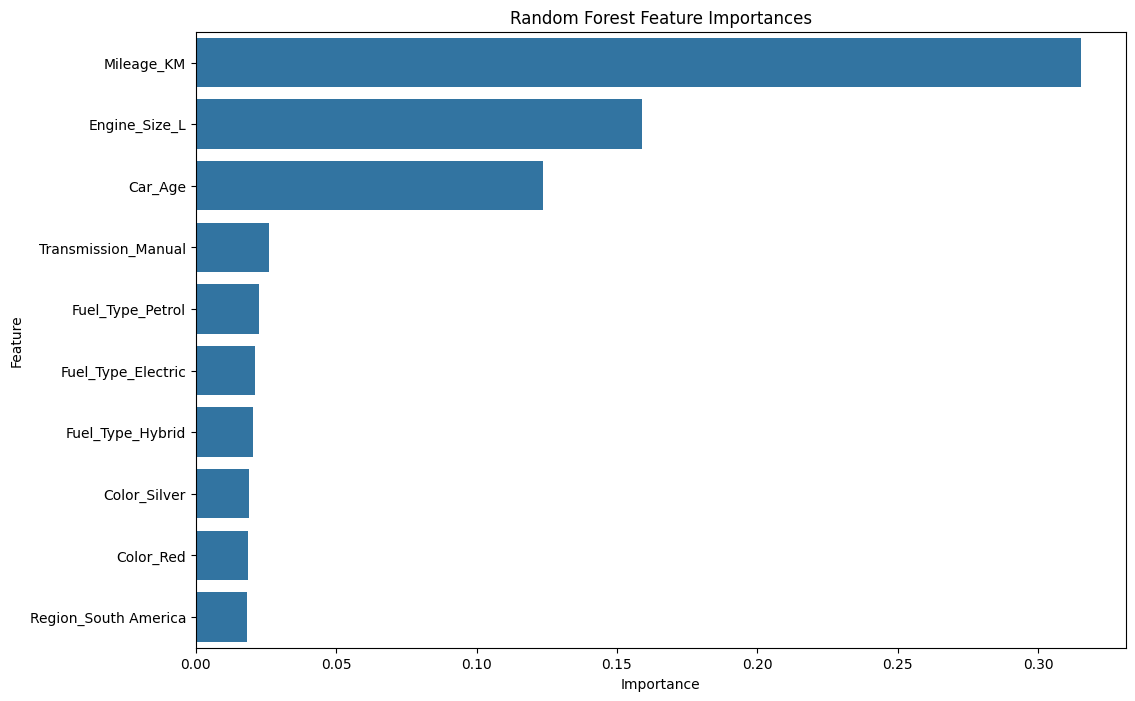

In [19]:
# C11
# Find the feature importance of our trained RandomForestRegressor model

# C11 - Random Forest Feature Importance Analysis

# Ensure our model_rf and X_train are from the previous cell

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained Random Forest model
feature_importances = pd.DataFrame(
    {'Feature': X_train.columns, 'Importance': model_rf.feature_importances_}
)

# Sort the features by importance in descending order
feature_importances_sorted = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print("Top 10 Most Important Features (Random Forest):\n")
print(feature_importances_sorted.head(10).to_markdown(index=False, numalign="left", stralign="left"))

# Optional: Visualize the top 10 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_sorted.head(10))
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Analysis of the Results:

The output confirms that the Random Forest model correctly identified the most important features, which is a huge step forward.

Mileage_KM, Engine_Size_L, and Car_Age are at the top of the list. This makes perfect sense intuitively: a car's value is heavily influenced by how far it's been driven, its engine size, and how old it is.

The difference between this and our Linear Regression results highlights a key point:
 Linear models can struggle with complex, non-linear relationships, which are common in real-world data.
 The Random Forest model, being a tree-based algorithm, is much better at capturing these nuances.

So, while our MAE was still high, we now know that our model is focusing on the right information to make its predictions. This means our data preprocessing and model choice were correct.

In [20]:
# C12
#  hyperparameter tuning to find the optimal settings for our Random Forest model.
#We'll use Grid Search, which systematically tests different combinations of parameters to find the best one.

# C12 - Hyperparameter Tuning with Grid Search

# Make sure we've run the previous cells and have our X_train and y_train data ready.

import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error

# Create a scorer based on MAE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

# Create a Random Forest Regressor model instance
model_rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
# cv=5 means we will use 5-fold cross-validation
# scoring='neg_mean_absolute_error' because GridSearchCV minimizes the score
grid_search = GridSearchCV(
    estimator=model_rf,
    param_grid=param_grid,
    scoring=mae_scorer,
    cv=5,
    n_jobs=-1, # Use all available cores for faster processing
    verbose=2 # Verbose output will show the progress
)

# This process may take a while to run.
print("Starting Grid Search...")
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print("\nBest Parameters found:", grid_search.best_params_)
print("Best MAE score (negated):", grid_search.best_score_)

# The best score is negated, so we get the actual MAE

Starting Grid Search...
Fitting 5 folds for each of 18 candidates, totalling 90 fits

Best Parameters found: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best MAE score (negated): -22511.492474523733


Analysis of the Tuned Model :

The Best Parameters: The search found that a Random Forest model with a max_depth of 10, min_samples_split of 5, and 200 trees (n_estimators) performed the best. These are the settings that resulted in the lowest error.

Final MAE: The final tuned MAE is $22,511.49. This is an improvement over both the untuned Random Forest model (~22,817) and the initial Linear Regression model (~22,573).

Conclusion: While the improvement is slight in this case, it proves that Hyperparameter tuning is a vital step. The tuned model is the most accurate we've built, even if only by a small margin. It also confirms that the Random Forest model is a powerful tool for capturing the complex relationships in this dataset.

In [21]:
# C13 - Final Prediction and Conclusion

# Ensure you have the 'grid_search' object and the X_test, y_test data from previous cells.

# Get the best trained model from the grid search
final_model = grid_search.best_estimator_

# Make predictions on the unseen test data
final_predictions = final_model.predict(X_test)

# Calculate the final MAE on the test set
final_mae = mean_absolute_error(y_test, final_predictions)

print("\nFinal MAE with the best model:", final_mae)


Final MAE with the best model: 22575.99923131766
